In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

try:
    sys.stdout.reconfigure(encoding="utf-8")
except Exception:
    pass

# Read the processed CSV file
df = pd.read_csv(r"D:\THStudy\UniversityStudy\Semester3\ADY\data_scrapping_coffee\data_demo_final\processed_coffee_data.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       20 non-null     int64  
 1   Area_Thousand_ha           20 non-null     float64
 2   Production_tons            19 non-null     float64
 3   Export_tons                18 non-null     float64
 4   Rainfall_mm                20 non-null     float64
 5   Humidity_Percent           20 non-null     float64
 6   Temperature_Celsius        20 non-null     float64
 7   Export_Value_Million_USD   18 non-null     float64
 8   World_Price_USD_per_ton    20 non-null     float64
 9   Vietnam_Price_USD_per_ton  18 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 1.7 KB


In [2]:


print(f"\nOriginal data shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()}")

# Function to fill missing values using average growth rate of next 3 years
def fill_missing_with_growth_rate(series):
    """Fill missing values by calculating average growth from next 3 years"""
    series = series.copy()
    
    for idx in series[series.isnull()].index:
        # Find next 3 non-null values
        future_values = []
        for i in range(1, 4):
            if idx + i < len(series) and pd.notna(series.iloc[idx + i]):
                future_values.append(series.iloc[idx + i])
        
        if len(future_values) >= 2:
            # Calculate average growth rate
            growth_rates = []
            for i in range(len(future_values) - 1):
                growth_rates.append(future_values[i+1] - future_values[i])
            avg_growth = np.mean(growth_rates)
            
            # Fill: next_year_value - avg_growth
            if idx + 1 < len(series) and pd.notna(series.iloc[idx + 1]):
                series.iloc[idx] = series.iloc[idx + 1] - avg_growth
                print(f"  Filled index {idx} ({df.loc[idx, 'Year']}): {series.iloc[idx]:.2f}")
    
    return series

# Apply filling to columns with missing values
print("\nFilling missing values...")

if df['Production_tons'].isnull().any():
    print("\n Production_tons:")
    df['Production_tons'] = fill_missing_with_growth_rate(df['Production_tons'])

if df['Export_tons'].isnull().any():
    print("\nExport_tons:")
    df['Export_tons'] = fill_missing_with_growth_rate(df['Export_tons'])

if df['Export_Value_Million_USD'].isnull().any():
    print("\n Export_Value_Million_USD:")
    df['Export_Value_Million_USD'] = fill_missing_with_growth_rate(df['Export_Value_Million_USD'])

if df['Vietnam_Price_USD_per_ton'].isnull().any():
    print("\nVietnam_Price_USD_per_ton:")
    df['Vietnam_Price_USD_per_ton'] = fill_missing_with_growth_rate(df['Vietnam_Price_USD_per_ton'])

print(f"\nAfter filling - Missing values:\n{df.isnull().sum()}")




Original data shape: (20, 10)
Missing values:
Year                         0
Area_Thousand_ha             0
Production_tons              1
Export_tons                  2
Rainfall_mm                  0
Humidity_Percent             0
Temperature_Celsius          0
Export_Value_Million_USD     2
World_Price_USD_per_ton      0
Vietnam_Price_USD_per_ton    2
dtype: int64

Filling missing values...

 Production_tons:

Export_tons:
  Filled index 1 (2006): 1251738.50

 Export_Value_Million_USD:
  Filled index 1 (2006): 2001.20

Vietnam_Price_USD_per_ton:
  Filled index 1 (2006): 1601.26

After filling - Missing values:
Year                         0
Area_Thousand_ha             0
Production_tons              1
Export_tons                  1
Rainfall_mm                  0
Humidity_Percent             0
Temperature_Celsius          0
Export_Value_Million_USD     1
World_Price_USD_per_ton      0
Vietnam_Price_USD_per_ton    1
dtype: int64



Final data for pair plot: (18, 7)

GENERATING PAIR PLOT...


<Figure size 1600x1400 with 0 Axes>

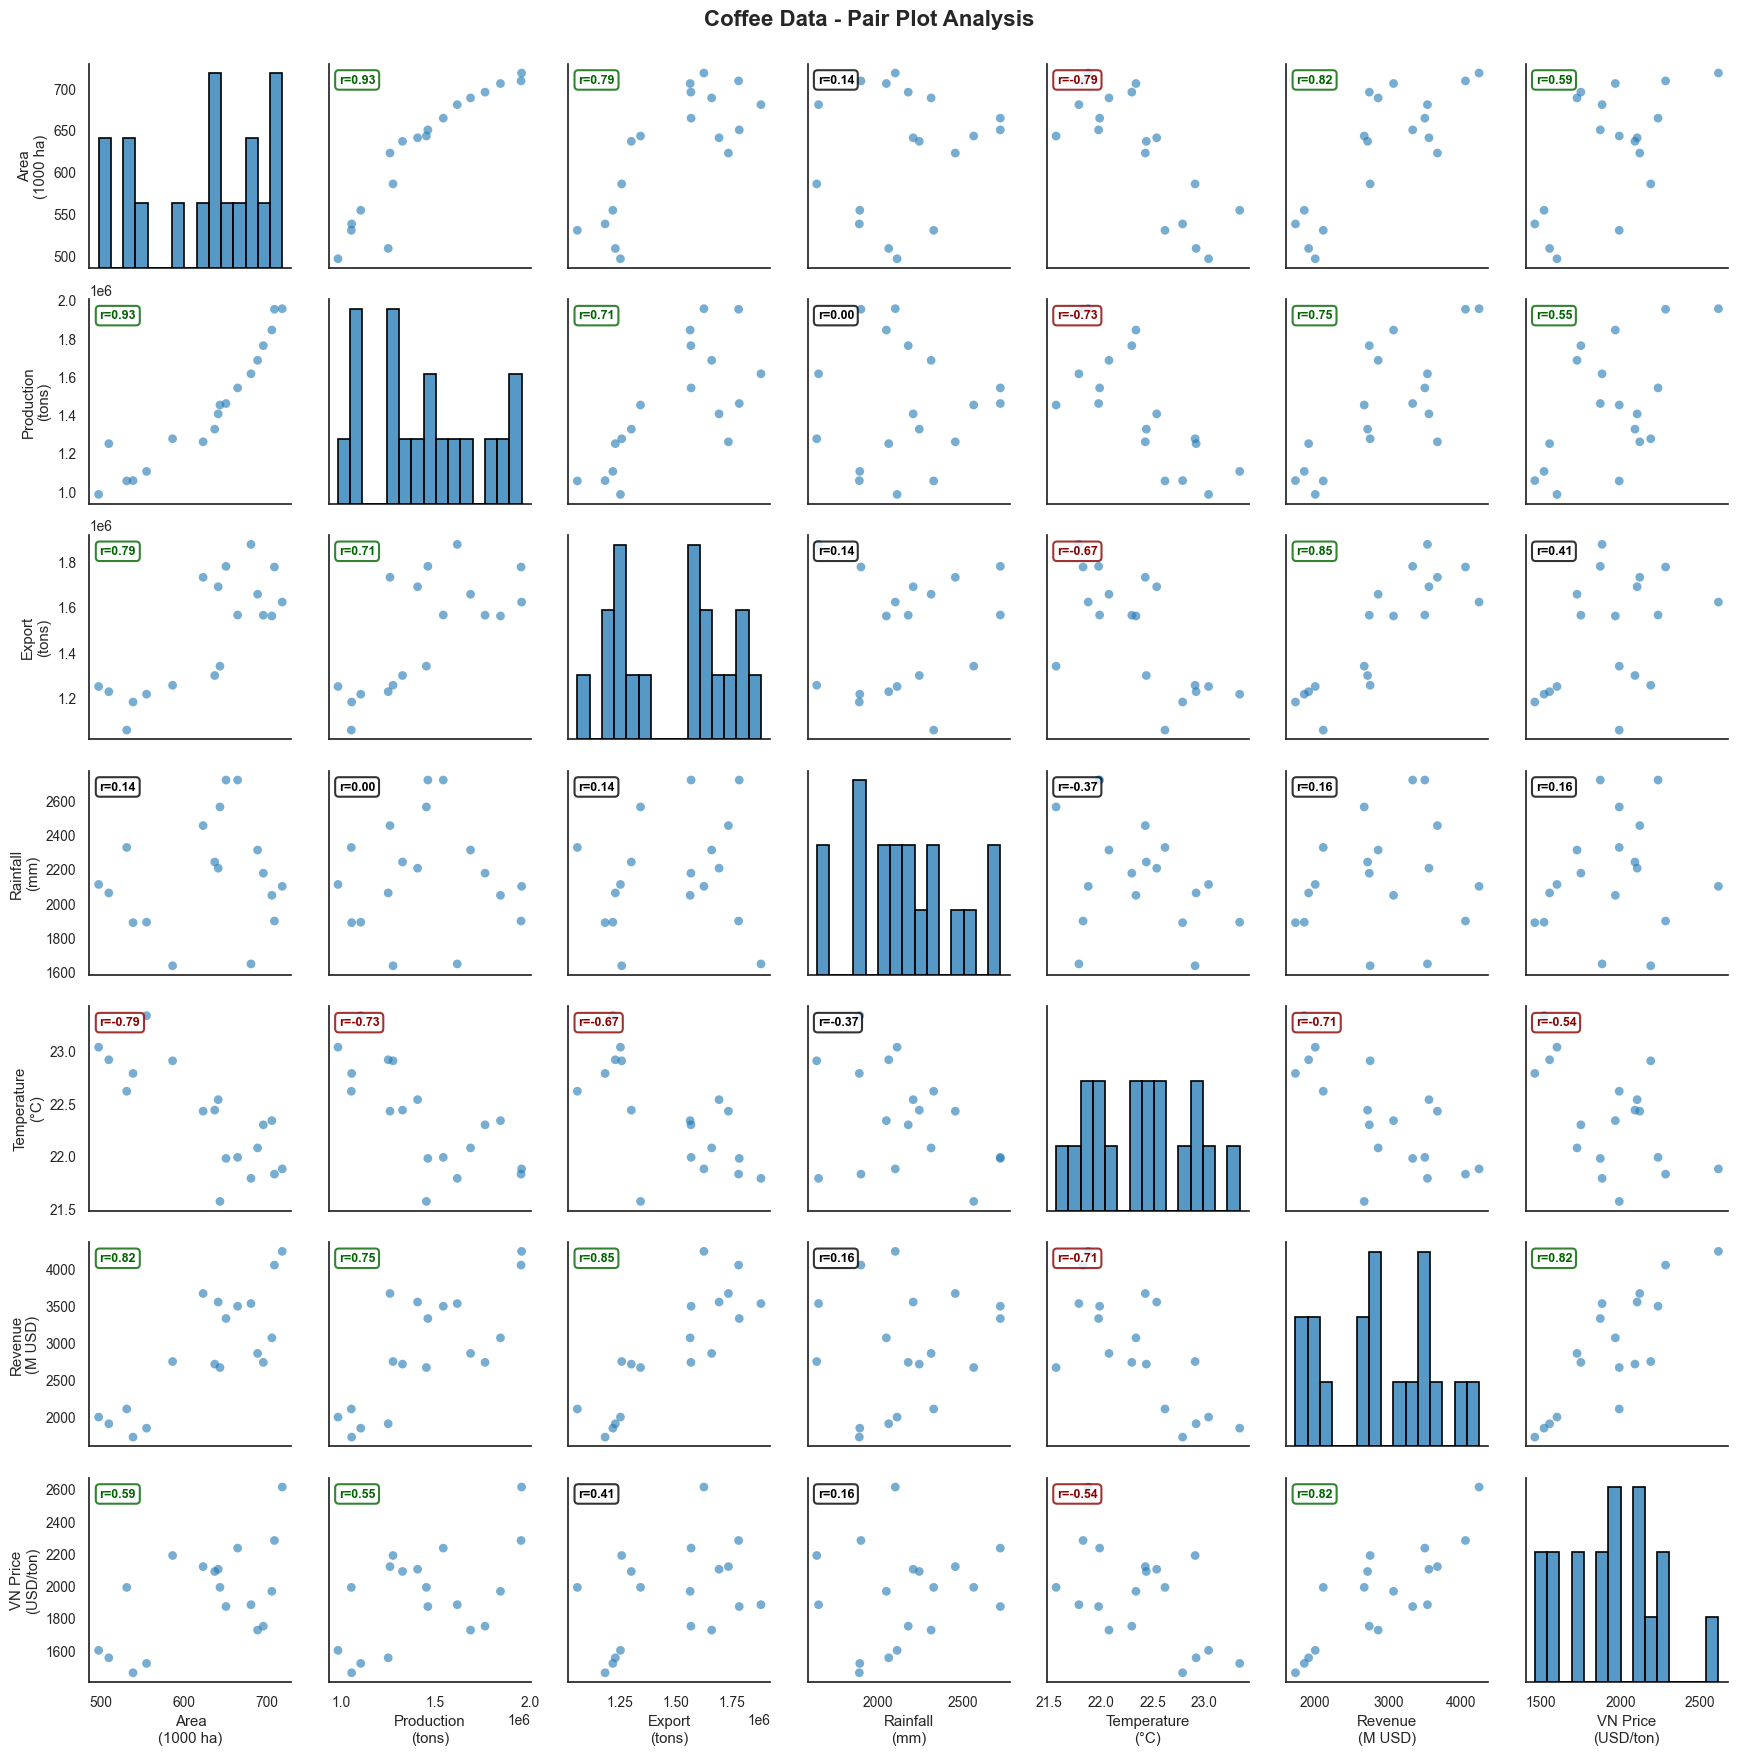


CORRELATION MATRIX
                     Area\n(1000 ha)  Production\n(tons)  Export\n(tons)  \
Area\n(1000 ha)                1.000               0.929           0.788   
Production\n(tons)             0.929               1.000           0.709   
Export\n(tons)                 0.788               0.709           1.000   
Rainfall\n(mm)                 0.140               0.005           0.142   
Temperature\n(°C)             -0.792              -0.731          -0.673   
Revenue\n(M USD)               0.816               0.753           0.851   
VN Price\n(USD/ton)            0.594               0.549           0.405   

                     Rainfall\n(mm)  Temperature\n(°C)  Revenue\n(M USD)  \
Area\n(1000 ha)               0.140             -0.792             0.816   
Production\n(tons)            0.005             -0.731             0.753   
Export\n(tons)                0.142             -0.673             0.851   
Rainfall\n(mm)                1.000             -0.375             

In [3]:
# Select key variables for pair plot
key_vars = [
    'Area_Thousand_ha',
    'Production_tons', 
    'Export_tons',
    'Rainfall_mm',
    'Temperature_Celsius',
    'Export_Value_Million_USD',
    'Vietnam_Price_USD_per_ton'
]

# Create clean dataset
plot_data = df[key_vars].dropna()

print(f"\nFinal data for pair plot: {plot_data.shape}")

# Rename for better labels
plot_data.columns = [
    'Area\n(1000 ha)',
    'Production\n(tons)',
    'Export\n(tons)',
    'Rainfall\n(mm)',
    'Temperature\n(°C)',
    'Revenue\n(M USD)',
    'VN Price\n(USD/ton)'
]

# Create pair plot
print("\n" + "="*80)
print("GENERATING PAIR PLOT...")
print("="*80)

# Set style
sns.set_style("white")
sns.set_context("notebook", font_scale=0.9)

# Create pair plot with larger figure size for Jupyter
plt.figure(figsize=(16, 14))

g = sns.pairplot(
    plot_data,
    diag_kind='hist',
    plot_kws={
        's': 40,
        'alpha': 0.6,
        'edgecolor': 'none'
    },
    diag_kws={
        'bins': 15,
        'edgecolor': 'black',
        'linewidth': 1.2
    },
    corner=False,
    height=2.5
)

# Customize
g.fig.suptitle('Coffee Data - Pair Plot Analysis', 
               fontsize=16, 
               fontweight='bold',
               y=1.001)

# Add correlation coefficients to scatter plots
for i in range(len(plot_data.columns)):
    for j in range(len(plot_data.columns)):
        if i != j:
            ax = g.axes[i, j]
            
            # Calculate correlation
            x_data = plot_data.iloc[:, j].values
            y_data = plot_data.iloc[:, i].values
            
            # Remove any remaining NaN
            mask = ~np.isnan(x_data) & ~np.isnan(y_data)
            if mask.sum() > 2:
                corr = np.corrcoef(x_data[mask], y_data[mask])[0, 1]
                
                # Add correlation text with color
                color = 'darkgreen' if corr > 0.5 else 'darkred' if corr < -0.5 else 'black'
                ax.text(
                    0.05, 0.95,
                    f'r={corr:.2f}',
                    transform=ax.transAxes,
                    fontsize=9,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor=color, linewidth=1.5),
                    color=color,
                    fontweight='bold'
                )

# Adjust layout
plt.tight_layout()
plt.show()

# Print correlation matrix
print("\n" + "="*80)
print("CORRELATION MATRIX")
print("="*80)
corr_matrix = plot_data.corr()
print(corr_matrix.round(3))

# Show strong correlations
print("\n" + "="*80)
print("STRONG CORRELATIONS (|r| > 0.7)")
print("="*80)
strong_corr_found = False
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            print(f"  {var1} ↔ {var2}: {corr_val:+.3f}")
            strong_corr_found = True

if not strong_corr_found:
    print("No strong correlations found (|r| > 0.7)")

print("\n" + "="*80)
print("Analysis Complete!")
print("="*80)